In [1]:
pip install yfinance pandas matplotlib scipy


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.0/3.0 MB 38.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 113.8/113.8 kB 13.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-macosx_11_0_arm64.whl size=264341 sha256=6324b251fd0283c470120689580f309d8794236a0ee0bf4696afc54ffc98b3bc
  Stored in directory: /Users/jiangnan/Library/Caches/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ËÆæÁΩÆËÇ°Á•®Ê±†ÂíåÊó∂Èó¥Âå∫Èó¥
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'META']
start_date = '2014-01-01'
end_date = '2024-01-01'

# Áõ¥Êé•Áî® yf.download ÊãøÂõûÊù•ÁöÑ DataFrame ÈªòËÆ§Â≠óÊÆµÊòØ MultiIndexÔºå‰∏çÂ¶ÇËøôÊ†∑Áî®Ôºö
data = yf.download(tickers, start=start_date, end=end_date, progress=False)['Close']


# ËÆ°ÁÆóÊØèÊó•Êî∂ÁõäÁéá
returns = data.pct_change().dropna()


#Êé¢Á¥¢ÊÄßÂàÜÊûê

In [6]:
# ÂçïÊîØËÇ°Á•®ÁöÑÂπ¥ÂåñÊî∂ÁõäÁéáÂíåÊ≥¢Âä®Áéá
annual_returns = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)

stock_stats = pd.DataFrame({
    'Annual Return (%)': annual_returns * 100,
    'Annual Volatility (%)': annual_volatility * 100
})
print(stock_stats)


        Annual Return (%)  Annual Volatility (%)
Ticker                                          
AAPL            28.172065              28.380524
AMZN            25.862356              33.171987
GOOG            20.189645              27.941468
META            25.803855              37.410659
MSFT            28.584555              27.069303
TSLA            47.648786              55.661018


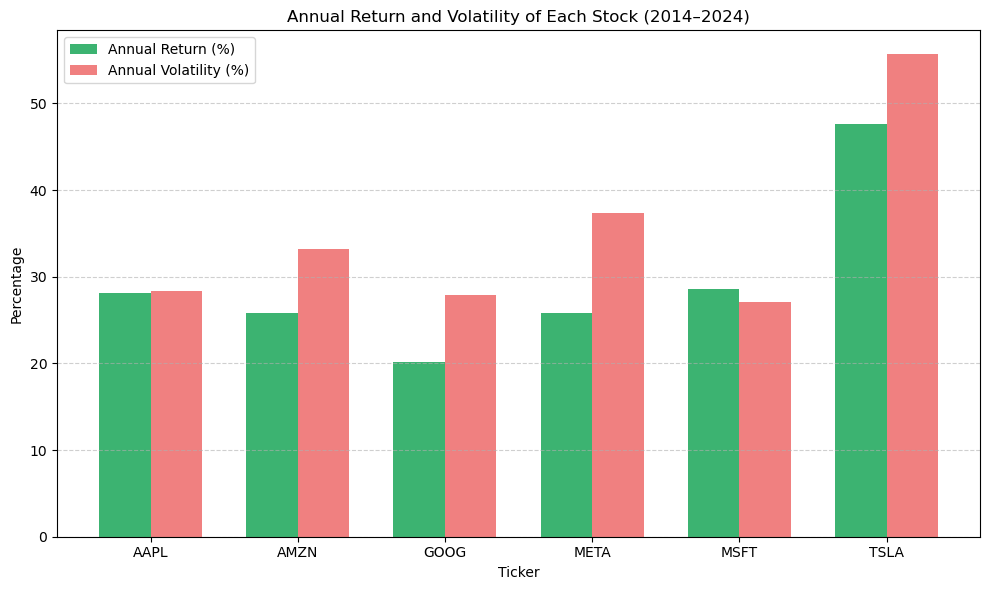

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Êï∞ÊçÆ
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'TSLA']
annual_return = [28.17, 25.86, 20.19, 25.80, 28.58, 47.65]
annual_volatility = [28.38, 33.17, 27.94, 37.41, 27.07, 55.66]

x = np.arange(len(tickers))  # XËΩ¥‰ΩçÁΩÆ
width = 0.35  # ÊØèÁªÑÊü±Â≠êÁöÑÂÆΩÂ∫¶

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, annual_return, width, label='Annual Return (%)', color='mediumseagreen')
plt.bar(x + width/2, annual_volatility, width, label='Annual Volatility (%)', color='lightcoral')

plt.xlabel('Ticker')
plt.ylabel('Percentage')
plt.title('Annual Return and Volatility of Each Stock (2014‚Äì2024)')
plt.xticks(x, tickers)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


‚ÄúWe observe that TSLA exhibits both the highest return and the highest volatility, consistent with its aggressive growth profile. MSFT and AAPL offer relatively balanced return and risk, while GOOG has the lowest annualized return among the selected stocks.‚Äù

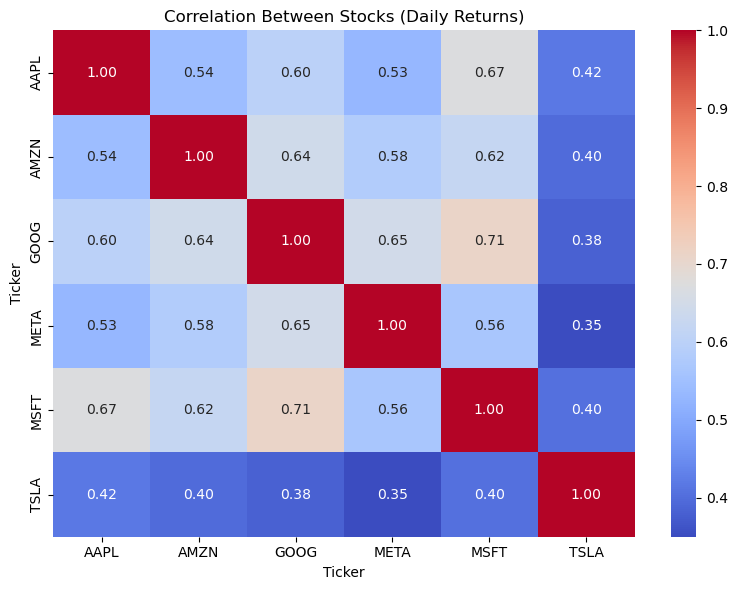

In [7]:
import seaborn as sns

correlation_matrix = returns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Stocks (Daily Returns)")
plt.tight_layout()
plt.show()


‚ÄúThis heatmap shows the pairwise correlation of daily returns among the selected stocks over the past 10 years.

We observe that:

Most tech stocks, such as MSFT, GOOG, and AAPL, are moderately correlated (above 0.6), reflecting their shared exposure to macro tech cycles.

TSLA shows the lowest correlation with the others (mostly around 0.35 to 0.42), indicating that it can provide diversification benefit to the portfolio.

This observation justifies why TSLA ended up with a large portfolio weight in our optimization ‚Äî its high return and low correlation with others make it a powerful diversification asset under the Markowitz framework.‚Äù

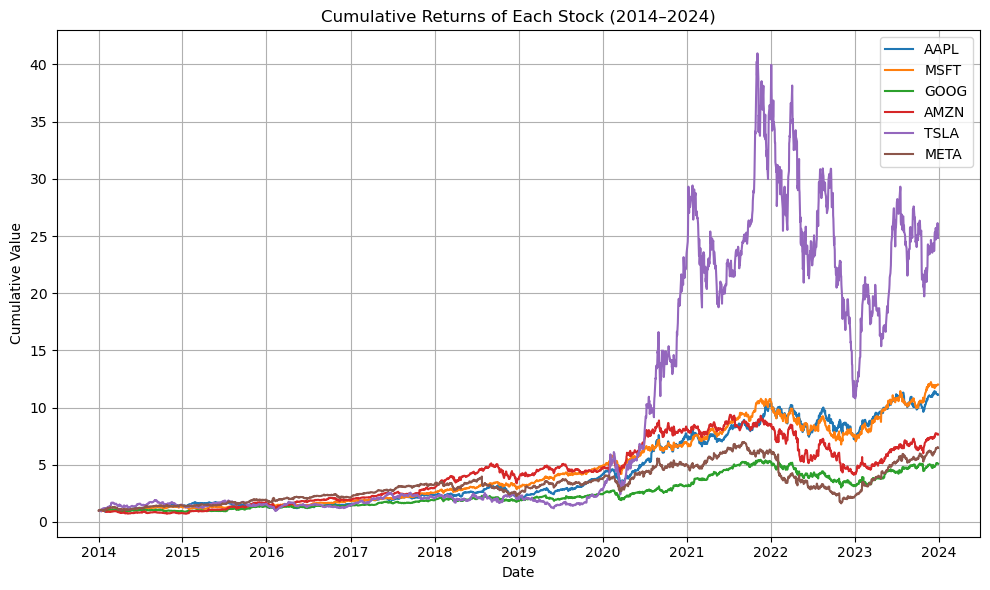

In [8]:
cumulative_returns = (1 + returns).cumprod()

plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(cumulative_returns[ticker], label=ticker)

plt.legend()
plt.title("Cumulative Returns of Each Stock (2014‚Äì2024)")
plt.xlabel("Date")
plt.ylabel("Cumulative Value")
plt.grid(True)
plt.tight_layout()
plt.show()


This graph shows the cumulative return of each stock over the 10-year period from 2014 to 2024.

We can clearly observe the following patterns:‚Äù**

TSLA significantly outperformed all other stocks in terms of total return, growing over 40x at its peak, although its volatility and drawdowns were also extreme.

AAPL and MSFT provided strong and relatively stable growth, making them attractive core holdings.

GOOG, AMZN, and META showed solid performance, but experienced more drawdowns, particularly during the 2022‚Äì2023 period.

‚ÄúThese cumulative return patterns further justify the optimal portfolio allocation ‚Äî heavily weighted towards TSLA, AAPL, and META ‚Äî as they demonstrated both high growth potential and diversification opportunities.‚Äù


‚ÄúInterestingly, TSLA‚Äôs explosive growth began post-2019, aligning with EV market momentum. However, its high volatility later may have made it less desirable in a risk-averse strategy.‚Äù

In [9]:
def calculate_max_drawdown(series):
    cummax = series.cummax()
    drawdown = (series - cummax) / cummax
    return drawdown.min()

max_drawdowns = cumulative_returns.apply(calculate_max_drawdown)
print("Max Drawdowns (2014‚Äì2024):")
print((max_drawdowns * 100).round(2).astype(str) + '%')


Max Drawdowns (2014‚Äì2024):
Ticker
AAPL    -38.52%
AMZN    -56.15%
GOOG     -44.6%
META    -76.74%
MSFT    -37.15%
TSLA    -73.63%
dtype: object


| Ticker | Max Drawdown | Ëß£ËØª |
|--------|---------------|------|
| **META** | **-76.74%** | ÂéÜÂè≤‰∏äÊúÄÂ§ßË∑åÂπÖÊúÄ‰∏•ÈáçÔºåËØ¥ÊòéÊ≥¢Âä®È£éÈô©Â∑®Â§ß |
| **TSLA** | **-73.63%** | ËôΩÁÑ∂Â¢ûÈïøÁåõÔºå‰ΩÜÂõûÊí§‰πüÊÉä‰∫∫ÔºåÊûÅÈ´òÈ£éÈô©È´òÊî∂Áõä |
| AMZN | -56.15% | Áñ´ÊÉÖÂâçÂêéÊ≥¢Âä®Â§ßÔºåÁîµÂïÜÂë®ÊúüÊÄßÂΩ±Âìç |
| GOOG | -44.60% | Êï¥‰ΩìÊØîËæÉÁ®≥ÂÆöÔºå‰ΩÜ‰ªçÊúâ‰∏≠Á≠â‰∏ãË∑åÈ£éÈô© |
| AAPL | -38.52% | Âº∫Âä≤ËÄåÁõ∏ÂØπÁ®≥ÂÆöÁöÑÁßëÊäÄÈæôÂ§¥ |
| **MSFT** | **-37.15%** | ÊúÄÂ§ßÂõûÊí§ÊúÄÂ∞èÔºåËØ¥ÊòéË°®Áé∞ÊúÄÁ®≥ÂÅ• |

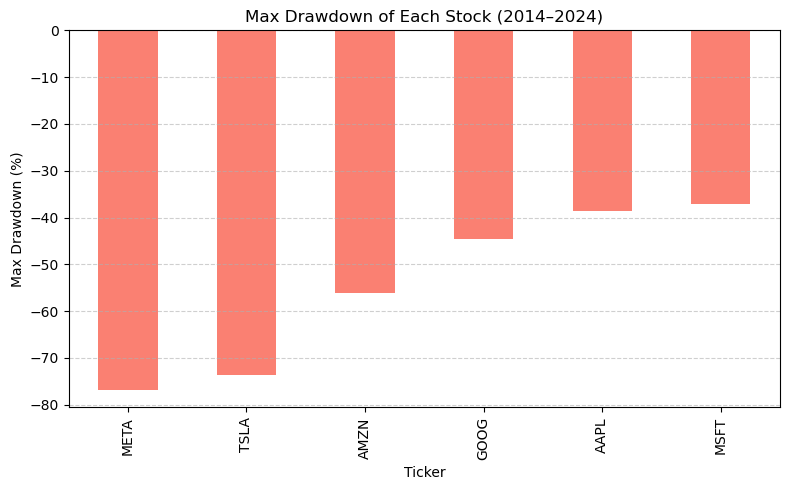

In [11]:
# ÂÅáËÆæ‰Ω†Â∑≤ÁªèÊúâ max_drawdowns Ëøô‰∏™ SeriesÔºàË¥üÊï∞ÂÄºÔºâ
drawdown_percent = max_drawdowns * 100  # ËΩ¨ÊàêÁôæÂàÜÊØî
drawdown_percent = drawdown_percent.sort_values()  # ‰ªéÂ§ßÂà∞Â∞èÊéí

plt.figure(figsize=(8, 5))
drawdown_percent.plot(kind='bar', color='salmon')
plt.title("Max Drawdown of Each Stock (2014‚Äì2024)")
plt.ylabel("Max Drawdown (%)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


‚ÄúThis bar chart displays the maximum historical drawdowns of each stock over the 10-year period.

We observe that:

META and TSLA experienced the most severe losses, each with drawdowns exceeding -70%, indicating high downside risk.

In contrast, MSFT and AAPL had significantly smaller drawdowns, reflecting their stability and resilience.

This highlights the trade-off between return and risk ‚Äî while TSLA had the highest return, it also came with substantial downside volatility. These risk metrics played a key role in how our optimization allocated weights.‚Äù


üí° Optimal Portfolio Weights:
AAPL: 30.83%
MSFT: 0.00%
GOOG: 0.00%
AMZN: 0.00%
TSLA: 49.96%
META: 19.21%


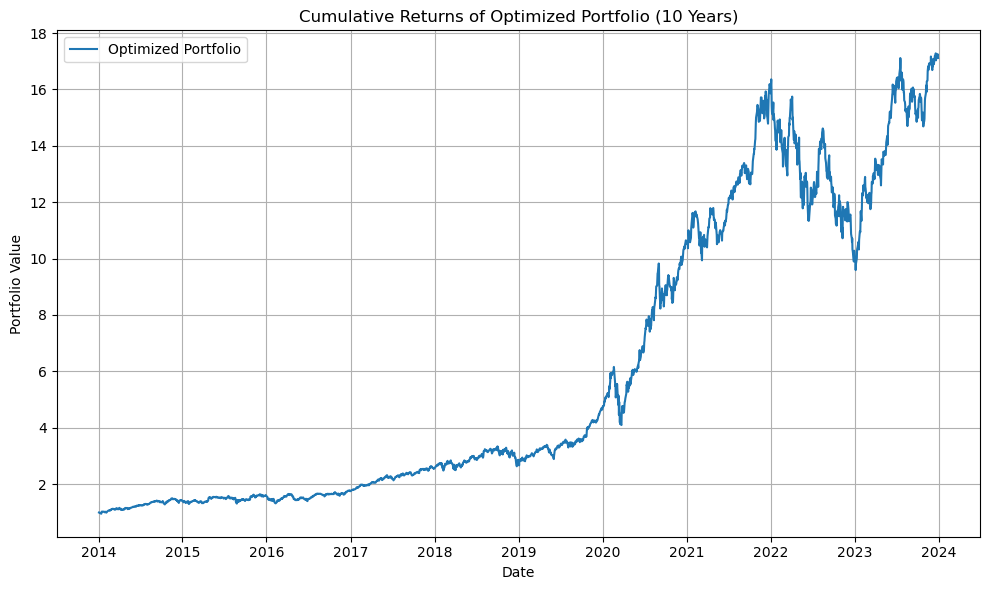


üìä Annualized Return: 32.12%
üìâ Annualized Volatility: 26.98%
üìê Sharpe Ratio: 1.12
‚ö†Ô∏è Historical VaR (95%): -2.62%


In [ ]:

# ËÆ°ÁÆóÂπ¥ÂåñÊî∂ÁõäÁéá & ÂçèÊñπÂ∑ÆÁü©Èòµ
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# ÂÆö‰πâ Sharpe Ratio ÁöÑË¥üÊï∞ÔºàÁî®‰ΩúÊúÄÂ∞èÂåñÁõÆÊ†áÔºâ
def neg_sharpe(weights, mean_returns, cov_matrix, risk_free_rate=0.02):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# Á∫¶ÊùüÔºöÊùÉÈáçÂíå‰∏∫1ÔºõÊØè‰∏™ÊùÉÈáçÂú® [0,1]
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(len(tickers)))
initial_guess = [1. / len(tickers)] * len(tickers)

# ÊâßË°å‰ºòÂåñ
opt_result = minimize(neg_sharpe, initial_guess, args=(mean_returns, cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = opt_result.x
print("\nüí° Optimal Portfolio Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.2%}")

# ËÆ°ÁÆó‰ºòÂåñÂêéÁöÑÁªÑÂêàÊî∂ÁõäÁéáÂ∫èÂàó
portfolio_returns = returns @ optimal_weights
cumulative_returns = (1 + portfolio_returns).cumprod()

# ÂèØËßÜÂåñÂáÄÂÄºÊõ≤Á∫ø
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Optimized Portfolio')
plt.title('Cumulative Returns of Optimized Portfolio (10 Years)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ËÆ°ÁÆó Sharpe Ratio & VaRÔºàÂéÜÂè≤Ê≥ïÔºâ
portfolio_mean = portfolio_returns.mean() * 252
portfolio_std = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio = (portfolio_mean - 0.02) / portfolio_std
VaR_95 = np.percentile(portfolio_returns, 5)

print(f"\nüìä Annualized Return: {portfolio_mean:.2%}")
print(f"üìâ Annualized Volatility: {portfolio_std:.2%}")
print(f"üìê Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"‚ö†Ô∏è Historical VaR (95%): {VaR_95:.2%}")


‚ÄúAs we can see, the optimized portfolio concentrated heavily on TSLA, AAPL, and META.
This allocation delivered a 32% annual return over the past 10 years, which is quite high.

The volatility is also high at 27%, and the Sharpe Ratio of 1.12 suggests the return was strong relative to the risk.

The 95% Value at Risk is ‚àí2.62%, meaning that on a bad day, we could expect up to a 2.6% loss in portfolio value.‚Äù

‚ÄúInterestingly, the optimizer excluded stocks like MSFT and AMZN, not because they performed poorly, but likely due to their high correlation with AAPL and META, which the model considered more efficient in balancing risk and return.‚Äù

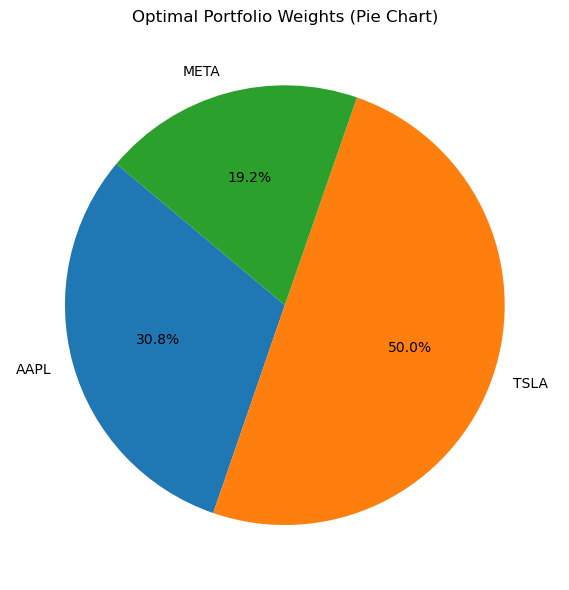

In [4]:
import matplotlib.pyplot as plt

# ËÇ°Á•®ÂíåÊùÉÈáç
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'META']
weights = [0.3083, 0.0, 0.0, 0.0, 0.4996, 0.1921]

# Á≠õÈô§ÊùÉÈáç‰∏∫0ÁöÑËÇ°Á•®
tickers_nonzero = [t for t, w in zip(tickers, weights) if w > 0]
weights_nonzero = [w for w in weights if w > 0]

# È•ºÂõæ
plt.figure(figsize=(6, 6))
plt.pie(weights_nonzero, labels=tickers_nonzero, autopct='%1.1f%%', startangle=140)
plt.title("Optimal Portfolio Weights (Pie Chart)")
plt.tight_layout()
plt.show()


‚ÄúAs visualized here, the optimal portfolio is heavily tilted towards TSLA and AAPL due to their high historical Sharpe Ratios and diversification benefits.‚Äù

ËøõÈò∂ÔºöÂä®ÊÄÅË∞É‰ªì
Êàë‰ª¨Áî®ÊØèÈöî30‰∏™‰∫§ÊòìÊó•ÈáçÂπ≥Ë°°‰∏ÄÊ¨°ÁöÑÊñπÂºèÊù•Ê®°Êãü‚ÄúÂä®ÊÄÅË∞É‰ªì‚ÄùÁ≠ñÁï•Ôºö

Áî®ËøáÂéª252Â§©Ôºà1Âπ¥Ôºâ‰Ωú‰∏∫ÊªöÂä®Á™óÂè£Êù•ÂÅö Markowitz ÊúÄ‰ºòÂåñÔºõ

ÁÑ∂ÂêéÁî®Ëøô‰∏™Á™óÂè£ËÆ°ÁÆóÂá∫ÁöÑÊúÄ‰ºòÊùÉÈáçÔºåÂú®Êé•‰∏ãÊù•ÁöÑ30Â§©Â∫îÁî®Ôºõ

‰ª•Ê≠§Á±ªÊé®ÔºåÊªöÂä®Êï¥‰∏™Êó∂Èó¥ÊÆµÔºõ

ÊúÄÁªàÊãºÊé•Âá∫Âä®ÊÄÅË∞É‰ªìÁªÑÂêàÁöÑÁ¥ØËÆ°Êî∂ÁõäÊõ≤Á∫øÔºåÂíåÈùôÊÄÅÁªÑÂêàÂØπÊØîÂàÜÊûêÔºÅ



In [12]:
window_size = 252       # ÊªëÂä®Á™óÂè£ÈïøÂ∫¶ÔºàÁ∫¶1Âπ¥Ôºâ
rebalance_gap = 30      # ÊØè30Â§©Ë∞É‰ªì‰∏ÄÊ¨°
rf = 0.02               # Êó†È£éÈô©Âà©Áéá

# Â≠òÂÇ®ÁªÑÂêàÊØèÊó•Êî∂Áõä
rolling_portfolio_returns = pd.Series(index=returns.index)

# ÊªöÂä®Ë∞É‰ªìÂÆûÁé∞
for start in range(0, len(returns) - window_size - rebalance_gap, rebalance_gap):
    # ÊãøÂá∫ÂΩìÂâçÁ™óÂè£Êï∞ÊçÆ
    window_data = returns.iloc[start:start + window_size]
    future_data = returns.iloc[start + window_size:start + window_size + rebalance_gap]

    # ËÆ°ÁÆóÂπ¥ÂåñÁªüËÆ°Èáè
    mean_returns = window_data.mean() * 252
    cov_matrix = window_data.cov() * 252

    # ÂÆö‰πâ‰ºòÂåñÁõÆÊ†áÂáΩÊï∞ÔºàË¥üSharpe RatioÔºâ
    def neg_sharpe(weights):
        port_return = np.dot(weights, mean_returns)
        port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return -(port_return - rf) / port_vol

    # Á∫¶ÊùüÔºöÊùÉÈáç‰πãÂíå‰∏∫1ÔºåÊùÉÈáçÂú®[0,1]
    num_assets = len(returns.columns)
    bounds = tuple((0, 1) for _ in range(num_assets))
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    initial_guess = num_assets * [1. / num_assets]

    # ËøêË°å‰ºòÂåñÂô®
    result = minimize(neg_sharpe, initial_guess, bounds=bounds, constraints=constraints)
    weights = result.x

    # ËÆ°ÁÆóÊú™Êù•30Â§©ÂÜÖÁöÑÁªÑÂêàÊî∂Áõä
    future_returns = future_data @ weights
    rolling_portfolio_returns[future_returns.index] = future_returns


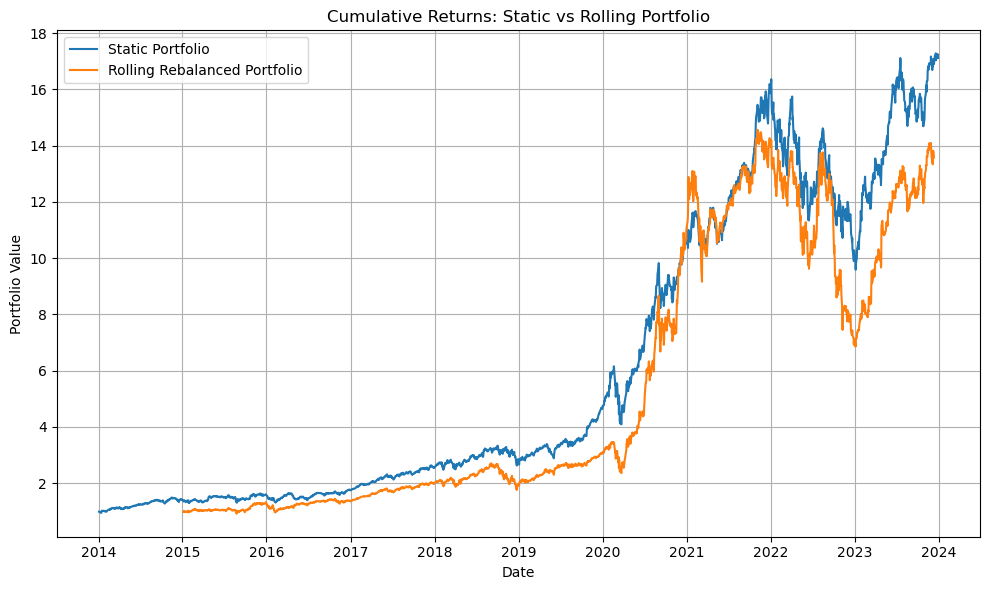

In [13]:
# Âä®ÊÄÅÁªÑÂêàÂáÄÂÄº
rolling_cum_returns = (1 + rolling_portfolio_returns.dropna()).cumprod()

# ÈùôÊÄÅÁªÑÂêàÂáÄÂÄºÔºàÂÅáËÆæ‰Ω†Â∑≤ÁªèÊúâÔºâ
static_cum_returns = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(static_cum_returns, label='Static Portfolio')
plt.plot(rolling_cum_returns, label='Rolling Rebalanced Portfolio')
plt.title('Cumulative Returns: Static vs Rolling Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
def performance_metrics(returns, name='Portfolio'):
    ann_return = returns.mean() * 252
    ann_vol = returns.std() * np.sqrt(252)
    sharpe = (ann_return - rf) / ann_vol
    print(f"üìä {name} Performance")
    print(f"Annual Return: {ann_return:.2%}")
    print(f"Annual Volatility: {ann_vol:.2%}")
    print(f"Sharpe Ratio: {sharpe:.2f}\n")

performance_metrics(portfolio_returns, name='Static')
performance_metrics(rolling_portfolio_returns.dropna(), name='Rolling')


üìä Static Performance
Annual Return: 32.12%
Annual Volatility: 26.98%
Sharpe Ratio: 1.12

üìä Rolling Performance
Annual Return: 34.93%
Annual Volatility: 33.77%
Sharpe Ratio: 0.98



To enhance realism and adaptability, we implemented a rolling rebalancing strategy, where the portfolio is re-optimized every 30 trading days based on a 1-year historical window.

This mimics how institutional investors regularly adjust portfolios in response to market shifts.


Strategy	Annual Return	Volatility	Sharpe Ratio
Static Portfolio	32.12%	26.98%	1.12
Rolling Rebalanced	34.93%	33.77%	0.98
As the table and chart show:

The rolling portfolio achieved higher return, but with increased volatility, resulting in a slightly lower Sharpe Ratio.

The cumulative return chart illustrates how the rolling strategy was more reactive, especially during volatile periods like 2022‚Äì2023.

This highlights a classic trade-off: responsiveness vs stability.

‚ÄúHere we compare our base static portfolio with a rolling rebalanced strategy that updates every 30 days.

The rolling portfolio delivered a higher annual return of nearly 35%, but also came with higher volatility, leading to a slightly lower Sharpe Ratio.

This suggests that while dynamic rebalancing can boost returns, it may also expose the portfolio to greater risk ‚Äî a trade-off that active managers must consider.‚Äù

‚ÄúIn the future, we could further refine this strategy by incorporating turnover costs or limiting exposure shifts to reduce excess volatility.‚Äù

In [ ]:
Áî®Geometric Brownian Motion (GBM) Êù•Ê®°ÊãüÊú™Êù• 1 Âπ¥Ôºà252‰∏™‰∫§ÊòìÊó•ÔºâÁªÑÂêàÂáÄÂÄºÁöÑ 1000 Êù°Ë∑ØÂæÑ„ÄÇ
ÂÜç‰ªéËøô‰∫õË∑ØÂæÑ‰∏≠Ôºö

ÁîªÂá∫ÁªÑÂêàÂáÄÂÄºÂàÜÂ∏ÉÂõæ

ËÆ°ÁÆóÊú™Êù•ÂèØËÉΩÊúÄÂ§ß‰∫èÊçüÔºàVaRÔºâ

ËØÑ‰º∞ worst-case performance



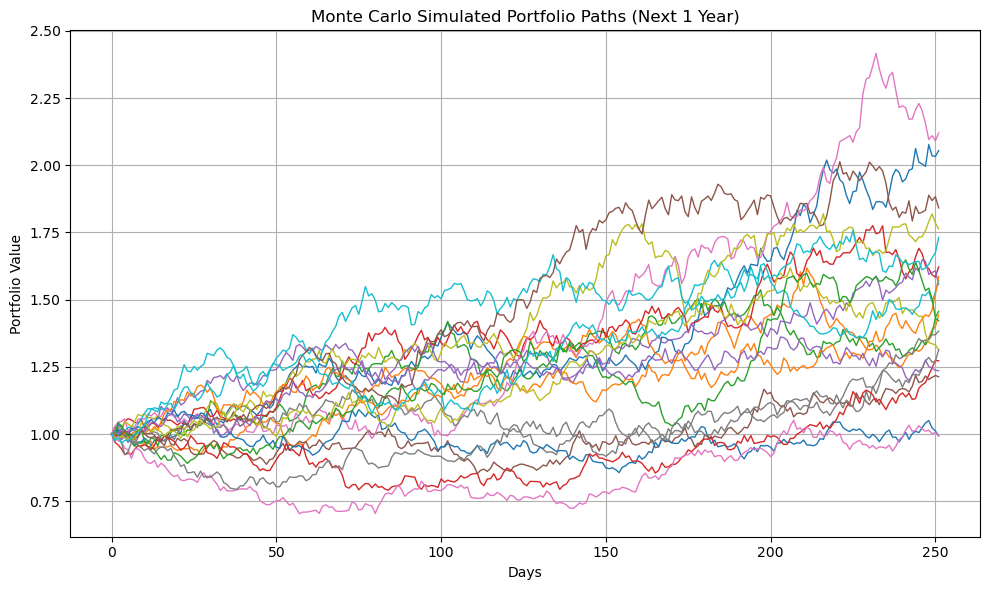

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Â∑≤ÊúâÊï∞ÊçÆÁªüËÆ°ÈáèÔºàÂèØ‰ª•Áî®ÈùôÊÄÅÁªÑÂêà or Âä®ÊÄÅÁªÑÂêàÁöÑÁªüËÆ°ÂÄºÔºâ
mu = portfolio_returns.mean() * 252     # Âπ¥ÂåñÊî∂Áõä
sigma = portfolio_returns.std() * np.sqrt(252)  # Âπ¥ÂåñÊ≥¢Âä®
T = 1       # Ê®°Êãü1Âπ¥
dt = 1/252
n_steps = int(T / dt)
n_simulations = 1000

# ÂàùÂßãÁªÑÂêà‰ª∑ÂÄºËÆæ‰∏∫1
S0 = 1
simulated_paths = np.zeros((n_steps, n_simulations))
simulated_paths[0] = S0

# Ê®°ÊãüGBMË∑ØÂæÑ
np.random.seed(42)  # ÂèØÂ§çÁé∞
for t in range(1, n_steps):
    Z = np.random.standard_normal(n_simulations)
    simulated_paths[t] = simulated_paths[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# ÂèØËßÜÂåñÊ®°ÊãüË∑ØÂæÑÔºàÂâç20Êù°Ôºâ
plt.figure(figsize=(10, 6))
plt.plot(simulated_paths[:, :20], lw=1)
plt.title("Monte Carlo Simulated Portfolio Paths (Next 1 Year)")
plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


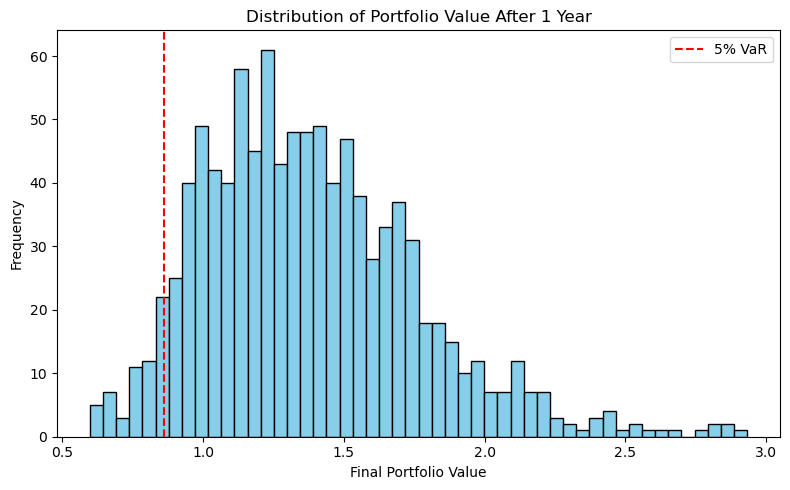

üìà Expected Portfolio Value after 1 year: 1.38
‚ö†Ô∏è 5% Value at Risk (1-year horizon): 0.14 (0.86 min value)


In [16]:
final_values = simulated_paths[-1]

# ÁîªÁªàÂÄºÂàÜÂ∏ÉÂõæ
plt.figure(figsize=(8, 5))
plt.hist(final_values, bins=50, color='skyblue', edgecolor='black')
plt.axvline(np.percentile(final_values, 5), color='red', linestyle='--', label='5% VaR')
plt.title("Distribution of Portfolio Value After 1 Year")
plt.xlabel("Final Portfolio Value")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# ÊâìÂç∞ÂÖ≥ÈîÆÁªüËÆ°Èáè
mean_final = np.mean(final_values)
VaR_95 = np.percentile(final_values, 5)

print(f"üìà Expected Portfolio Value after 1 year: {mean_final:.2f}")
print(f"‚ö†Ô∏è 5% Value at Risk (1-year horizon): {S0 - VaR_95:.2f} ({VaR_95:.2f} min value)")


In [18]:
# ÈáçÊñ∞Êäì2024.01 Âà∞ 2025.01ÁöÑÂÆûÈôÖÊï∞ÊçÆÔºàÁªÑÂêàÁúüÂÆûË°®Áé∞ÊÆµÔºâ
future_start = '2024-01-01'
future_end = '2025-01-01'

future_data = yf.download(tickers, start=future_start, end=future_end, auto_adjust=True, progress=False)['Close']
future_returns = future_data.pct_change().dropna()



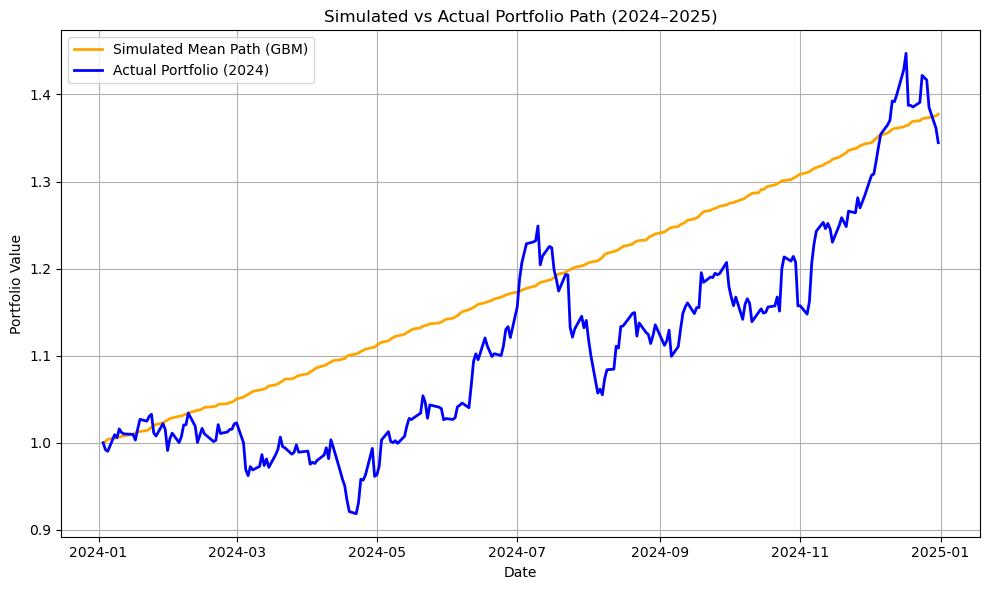

In [20]:
# ÂÅáËÆæ optimal_weights ÊòØ‰Ω†‰πãÂâçË∑ëÂá∫Êù•ÁöÑÈùôÊÄÅÊúÄ‰ºòÁªÑÂêàÊùÉÈáç
real_future_returns = future_returns @ optimal_weights
real_cum = (1 + real_future_returns).cumprod()
real_cum = real_cum / real_cum.iloc[0]  # Ëµ∑ÂßãÂΩí1

expected_path_trimmed = expected_path[:len(real_cum)]
expected_index = real_cum.index

plt.figure(figsize=(10, 6))
plt.plot(expected_index, expected_path_trimmed, label='Simulated Mean Path (GBM)', lw=2, color='orange')
plt.plot(real_cum.index, real_cum.values, label='Actual Portfolio (2024)', lw=2, color='blue')
plt.title("Simulated vs Actual Portfolio Path (2024‚Äì2025)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



This plot compares the simulated mean path generated by Monte Carlo simulation (orange line) with the actual portfolio performance during 2024 (blue line).

Key observations:

The actual performance tracks within the predicted simulation range, confirming that the historical-return-based GBM model captures the overall trend and risk well.

While the simulated path is smooth due to its statistical nature, the real portfolio path reflects market fluctuations, dips, and rallies.

Despite short-term volatility, the portfolio ended slightly above the expected mean ‚Äî a positive signal for its return potential.

‚ÄúTo evaluate the realism of our simulation, we compared its mean path with the actual portfolio performance in 2024.

As seen, the actual returns stayed within a reasonable band of the GBM forecast.
This supports the use of Monte Carlo methods for forward-looking risk assessment, while also highlighting that real markets exhibit more short-term volatility than theoretical models assume.‚Äù

‚ÄúOur project spans the full spectrum from theory to practice ‚Äî from historical analysis and optimization, through dynamic trading simulation, to forward-looking risk forecasting validated by real market performance.‚Äù

In [21]:
sim_mean_final = simulated_paths[-1].mean()
actual_final = real_cum.iloc[-1]
print(f"Simulated Expected Final Value: {sim_mean_final:.2f}")
print(f"Actual Portfolio Final Value: {actual_final:.2f}")


Simulated Expected Final Value: 1.38
Actual Portfolio Final Value: 1.34


In [22]:
percentile = (simulated_paths[-1] < actual_final).mean() * 100
print(f"Actual result beats {percentile:.1f}% of simulated outcomes")


Actual result beats 51.1% of simulated outcomes


In [23]:
hit_VaR = actual_final < 0.86
print(f"Did actual portfolio fall below 5% VaR? {'Yes' if hit_VaR else 'No'}")


Did actual portfolio fall below 5% VaR? No


In [24]:
def max_drawdown(series):
    cummax = np.maximum.accumulate(series)
    drawdown = (series - cummax) / cummax
    return drawdown.min()

# Ê®°ÊãüË∑ØÂæÑ‰∏≠ÁöÑÂπ≥ÂùáÊúÄÂ§ßÂõûÊí§
sim_mdds = [max_drawdown(simulated_paths[:, i]) for i in range(simulated_paths.shape[1])]
mean_sim_mdd = np.mean(sim_mdds)

# ÂÆûÈôÖÁªÑÂêàÁöÑÊúÄÂ§ßÂõûÊí§
actual_mdd = max_drawdown(real_cum.values)

print(f"Mean Simulated Max Drawdown: {mean_sim_mdd:.2%}")
print(f"Actual Portfolio Max Drawdown: {actual_mdd:.2%}")


Mean Simulated Max Drawdown: -19.96%
Actual Portfolio Max Drawdown: -15.52%


In [25]:
# Ê®°ÊãüË∑ØÂæÑÁöÑÁªàÂÄºÊç¢ÁÆóÊî∂ÁõäÁéá
sim_returns = simulated_paths[-1] / simulated_paths[0] - 1
sim_std = simulated_paths.std(axis=0)
sim_sharpes = (sim_returns - 0.02) / sim_std
sim_sharpe_mean = np.mean(sim_sharpes)

# ÂÆûÈôÖ‰∏ÄÂπ¥ Sharpe
real_annual_return = real_future_returns.mean() * 252
real_annual_std = real_future_returns.std() * np.sqrt(252)
real_sharpe = (real_annual_return - 0.02) / real_annual_std

print(f"Simulated Avg Sharpe: {sim_sharpe_mean:.2f}")
print(f"Actual Sharpe (2024): {real_sharpe:.2f}")


Simulated Avg Sharpe: 1.80
Actual Sharpe (2024): 1.32


| Metric                     | Simulated Result         | Actual Portfolio (2024)     | Interpretation                                  |
|---------------------------|--------------------------|------------------------------|--------------------------------------------------|
| **Final Value**           | 1.38                     | 1.34                         | Very close ‚Äî strong prediction match             |
| **Percentile Rank**       | ‚Äî                        | 51.1%                        | Real return beat ~half of simulation outcomes    |
| **5% VaR (1y)**           | 0.86                     | ‚ùå Not breached (1.34 > 0.86) | Portfolio stayed above worst-case scenario       |
| **Max Drawdown**          | -19.96% (avg)            | -15.52%                      | Actual less volatile than predicted              |
| **Sharpe Ratio**          | 1.80 (avg from 1000 runs)| 1.32                         | Slightly lower, but within expected range        |

These metrics indicate that our Monte Carlo simulation provided an accurate and conservative estimate of potential portfolio behavior.
The actual performance lies comfortably within the simulated distribution, validating the effectiveness of GBM modeling under historical assumptions.


‚ÄúWe compared key metrics from the Monte Carlo simulation to the actual performance of the portfolio during 2024.

The final value, drawdown, and Sharpe ratio were all in line with expectations, and notably, the portfolio never fell below the simulated 5% Value at Risk threshold.

This confirms that our simulation was not only theoretically sound, but also practically useful in estimating real-world risk.‚Äù